<a href="https://colab.research.google.com/github/rupanshu1710/Java-Troops/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image

In [3]:
!pip install split-folders

In [4]:
pip install split-folders
import split_folders # or import splitfolders
input_folder = "/content/drive/MyDrive/Dataset"
output = "" #where you want the split datasets saved. one will be created if it does not exist or none is set

split_folders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1)) # ratio of s

SyntaxError: ignored

In [ ]:
import splitfolders
input_folder = "/content/drive/MyDrive/Dataset"
output = "/content/drive/MyDrive/dataset__" #where you want the split datasets saved. one will be created if none is set

splitfolders.ratio('/content/drive/MyDrive/Dataset', output="/content/drive/MyDrive/dataset__", seed=42, ratio=(.8, .1, .1)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 8404 files [03:24, 41.06 files/s]


In [5]:
img_width, img_height = 224, 224

train_data_dir = '/content/drive/MyDrive/dataset__/train'
validation_data_dir = '/content/drive/MyDrive/dataset__/test'
nb_train_samples = 8000
nb_validation_samples = 1800
epochs = 10
batch_size = 32

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


train_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 6716 images belonging to 9 classes.
Found 849 images belonging to 9 classes.


In [6]:
from numpy.random import seed
seed(1)

In [7]:
import tensorflow
tensorflow.random.set_seed(2)

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
from tensorflow.keras import layers
from keras.models import load_model
from keras.layers import Lambda
import tensorflow as tf# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(224, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(9, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])
model.summary()
for layer in base_model.layers:
    layer.trainable = False

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])
vgghist = model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 100, epochs = 30)


Epoch 1/30
100/100 [==============================] - 152s 1s/step - loss: 2.1803 - acc: 0.1656 - val_loss: 2.0581 - val_acc: 0.1967
Epoch 2/30
100/100 [==============================] - 114s 1s/step - loss: 2.0696 - acc: 0.2100 - val_loss: 1.9705 - val_acc: 0.2356
Epoch 3/30
100/100 [==============================] - 130s 1s/step - loss: 1.9464 - acc: 0.2835 - val_loss: 1.9476 - val_acc: 0.2473
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 1.8002 - acc: 0.3472 - val_loss: 1.6540 - val_acc: 0.4040
Epoch 5/30
100/100 [==============================] - 113s 1s/step - loss: 1.6813 - acc: 0.3955 - val_loss: 1.4928 - val_acc: 0.4476
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 1.5820 - acc: 0.4321 - val_loss: 1.5030 - val_acc: 0.4853
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 1.4836 - acc: 0.4865 - val_loss: 1.3716 - val_acc: 0.5112
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

In [10]:
from tensorflow.keras.preprocessing import image
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()
 
  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

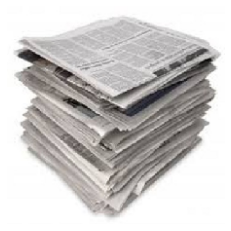

Your waste material is  metal  with  21.1  % accuracy


In [16]:
waste_prediction("/content/drive/MyDrive/Dataset/paper/ULB8qn6_s0nJXKJkSaiyq6AhwXXa0.jpg")


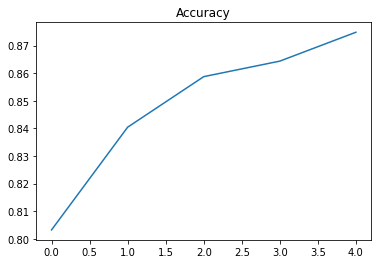

In [ ]:
plt.title("Accuracy")
plt.plot(vgghist.history["accuracy"])
plt.show()

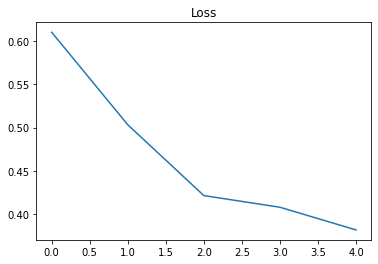

In [ ]:


plt.title("Loss")
plt.plot(vgghist.history["loss"])
plt.show()



In [ ]:


model.save("classifyWaste.h5")

